<h1><center>5. Anomaly Detection</center></h1>

<p style='text-align: center;'> 
Jishnu Jeevan <br>
Department of Computer Science <br>
M.Tech Computer and Information Science <br>
jishnujeevan@cusat.ac.in <br>
</p>

<h2><center> Assignemt Objective</center></h2>
<p style='text-align: justify;'>
This is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between "bad" connections, called intrusions or attacks, and "good" normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.<br>
The link for the data set:<br>
<b>http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html-kddcup.data_10_percent.gz</b><br>
    
<i>NOTE: If you go to the link you will find that the dataset(when uncompressed) is 743M in size. Due to the vast computationl time and resources that is needed to process a dataset of that size, I have decided to use the following two dataset for training and testing:<i><br>
<i>Training: kddcup.data_10_percent.gz A 10% subset. (2.1M; 75M Uncompressed) <i><br>
<i>Testing: kddcup.newtestdata_10_percent_unlabeled.gz (1.4M; 45M Uncompressed)<i><br>
<i>Labels of test data: corrected.gz Test data with corrected labels.<i></br>
</p>

<h2>The data set contains the following columns i.e features</h2>
<p style='text-align: justify;'>
Input variables:<br>
1. duration: continuous. <br>
2. protocol_type: symbolic.<br>
3. service: symbolic.<br>
4. flag: symbolic.<br>
5. src_bytes: continuous.<br>
6. dst_bytes: continuous.<br>
7. land: symbolic.<br>
8. wrong_fragment: continuous.<br>
9. urgent: continuous.<br>
10. hot: continuous.<br>
11. num_failed_logins: continuous.<br>
12. logged_in: symbolic.<br>
13. num_compromised: continuous.<br>
14. root_shell: continuous.<br>
15. su_attempted: continuous.<br>
16. num_root: continuous.<br>
17. num_file_creations: continuous.<br>
18. num_shells: continuous.<br>
19. num_access_files: continuous.<br>
20. num_outbound_cmds: continuous.<br>
21. is_host_login: symbolic.<br>
22. is_guest_login: symbolic.<br>
23. count: continuous.<br>
24. srv_count: continuous.<br>
25. serror_rate: continuous.<br>
26. srv_serror_rate: continuous.<br>
27. rerror_rate: continuous.<br>
28. srv_rerror_rate: continuous.<br>
29. same_srv_rate: continuous.<br>
30. diff_srv_rate: continuous.<br>
31. srv_diff_host_rate: continuous.<br>
32. dst_host_count: continuous.<br>
33. dst_host_srv_count: continuous.<br>
34. dst_host_same_srv_rate: continuous.<br>
35. dst_host_diff_srv_rate: continuous.<br>
36. dst_host_same_src_port_rate: continuous.<br>
37. dst_host_srv_diff_host_rate: continuous.<br>
38. dst_host_serror_rate: continuous.<br>
39. dst_host_srv_serror_rate: continuous.<br>
40. dst_host_rerror_rate: continuous.<br>
41. dst_host_srv_rerror_rate: continuous.<br>
    
Output variable (desired target):<br>
42. Type of connection. This is a multi-class classification. So the different classes are:<br>
back, buffer_overflow, ftp_write, guess_passwd, imap,ipsweep, land, loadmodule, multihop, neptune, nmap, normal, perl, phf, pod, portsweep, rootkit, satan, smurf, spy, teardrop, warezclient, warezmaster.<br>
Where normal is the good connection<br>
</p>

### 1. Import the required libraries

In [1]:
# For reading the data
import pandas as pd
import numpy as np

# For training, testing and splitting of the data
from sklearn.model_selection import train_test_split

# For calculating accuracy, precision and recall and confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix

#Classification Algorithms 
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Loading and displaying the data
### NOTE: Originally the columns did not have labels like duration, protocol_type etc. I edited the file in Notepad++ and added the columns manually. I did it for the test data and the labelled test data

In [2]:
train_data = pd.read_csv("./train.data_10_percent_corrected", delimiter=",")
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [3]:
# Describe the training data
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Let us find out the shape of the data set
train_data.shape

(494021, 42)

### 3. Data preprocessing

#### 3a. Let us find out the data type of each column

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

#### 3b. Let us see if there are any missing values

In [6]:
percent_missing = train_data.isnull().sum() * 100 / len(train_data)
missing_value = pd.DataFrame({'column_name': train_data.columns,'percent_missing': percent_missing})
print(missing_value)

                                             column_name  percent_missing
duration                                        duration              0.0
protocol_type                              protocol_type              0.0
service                                          service              0.0
flag                                                flag              0.0
src_bytes                                      src_bytes              0.0
dst_bytes                                      dst_bytes              0.0
land                                                land              0.0
wrong_fragment                            wrong_fragment              0.0
urgent                                            urgent              0.0
hot                                                  hot              0.0
num_failed_logins                      num_failed_logins              0.0
logged_in                                      logged_in              0.0
num_compromised                       

#### So, there are no missing values. So we don't need to worry about that

#### 3c. Now let us seperate the categorical values, numerical values and the output values

In [7]:
# Categorical features
categorical_features = train_data.select_dtypes(include=['object']).columns
print(categorical_features)
print("Categorical Features : ", str(len(categorical_features)))

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')
Categorical Features :  4


In [8]:
# Numerical features
numerical_features = train_data.select_dtypes(exclude = ["object"]).columns
print(numerical_features)
print("Numerical features : ", str(len(numerical_features)))

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
Numerical features :  38


In [9]:
# Now let us remove the target variable
y = train_data.label
categorical_features = categorical_features.drop("label")

In [10]:
# Now we are going to create a training data with numerical data and categorial data

# Numerical data training set
train_num = train_data[numerical_features]

# Categorical data training set
train_cat = train_data[categorical_features]

#### 3d. Now we are going to do one hot encoding on the categorical data

In [11]:
train_cat = pd.get_dummies(train_cat)
train_cat.shape

(494021, 80)

#### 3e. Let us see if there are any redunanct columns in numberical data, i.e. columns that won't give much information. This can be done by finding out the mean of each column. If the mean is 0 then the entries in columns are 0 and it provides no useful information.

In [12]:
train_num.mean(axis=0)

duration                         47.979302
src_bytes                      3025.610296
dst_bytes                       868.532425
land                              0.000045
wrong_fragment                    0.006433
urgent                            0.000014
hot                               0.034519
num_failed_logins                 0.000152
logged_in                         0.148247
num_compromised                   0.010212
root_shell                        0.000111
su_attempted                      0.000036
num_root                          0.011352
num_file_creations                0.001083
num_shells                        0.000109
num_access_files                  0.001008
num_outbound_cmds                 0.000000
is_host_login                     0.000000
is_guest_login                    0.001387
count                           332.285690
srv_count                       292.906557
serror_rate                       0.176687
srv_serror_rate                   0.176609
rerror_rate

#### We can see that the columns num_outbound_cmds and is_host_login have mean of 0. So they provide no useful information. So we will delete the two columns

In [13]:
train_num.drop("num_outbound_cmds", axis=1, inplace=True)
train_num.drop("is_host_login", axis=1, inplace=True)
train_num.shape

E:\Software\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(494021, 36)

#### 3g. Now we are going to concatenate the categoriacal and numerical data into one dataset

In [14]:
train_data = pd.concat([train_cat,train_num],axis=1)
print(train_data.shape)

(494021, 116)


In [15]:
# Display the training data
train_data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,0,0,0,0,0,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,0,1,0,0,0,0,0,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,0,0,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


### 4. Data visualization

#### 4a. Let us look at the type of classes we have on the output

In [16]:
print(y.value_counts())

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64


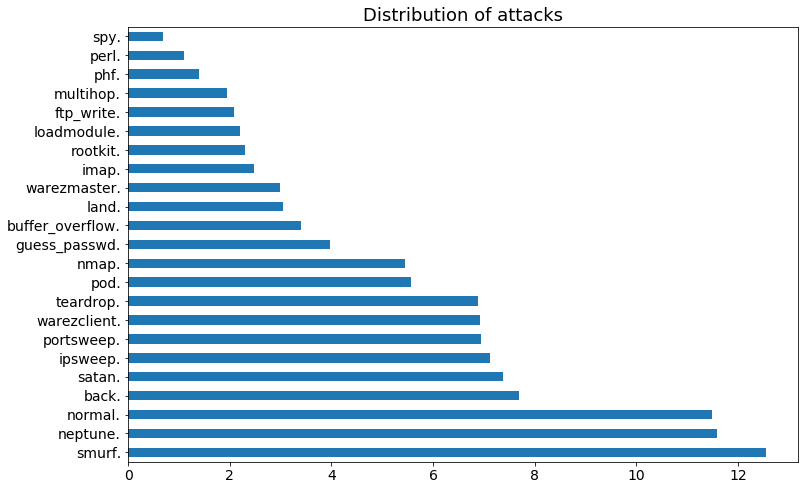

In [17]:
plt.figure(figsize=(12,8))
params = {'axes.titlesize':'18','xtick.labelsize':'14','ytick.labelsize':'14'}
plt.rcParams.update(params)
plt.title('Distribution of attacks')
y.value_counts().apply(np.log).plot(kind='barh')
plt.show()

### 5. Let us now split the dataset into training (70% of the dataset) and test (30% of the dataset). Due to the large number of rows in the dataset(over 400,000) I am only going to use 10,000 rows to train the model as training the dataset with 400,000 rows takes a lot of time. This will reduce the accuracy of the model 

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data.sample(n=10000, replace = False),
                                                    y.sample(n=10000, replace = False),                              
                                                    test_size = 0.3
                                                   )

### 6. We are going to use different binary classification algorithms to do classification on the data, and we will evaluate the accuarcy of each algorithm.
### The algorithms we are going to use are
1. XGB Classifier
2. Logistics Regression
3. Random Forest Classifier
4. Decision Tree
5. Linear Discriminant Analysis
6. K Nearest Neighbour
7. Gaussian Naive Bayes 
8. AdaBoosting

In [20]:
# To surpress warning messages
import warnings
warnings.filterwarnings('ignore')

# Create a dictionary to find out the best classifier using accuracy score
ranking = {}

# We are going to be using the following classifiers and doing a comparision study
classifiers = {
                '1. XGB Classifier':XGBClassifier(n_estimator = 500, learning_rate = 0.5),
                '2. Logistic Regression':LogisticRegression(),
                '3. Random Forest Classifier': RandomForestClassifier(),
                '4. Decision Tree Classifier':DecisionTreeClassifier(),
                '5. Linear Discriminant Analysis':LinearDiscriminantAnalysis(),               
                '6. K Nearest Neighbour':KNeighborsClassifier(8),                
                '7. Gaussian Naive Bayes Classifier':GaussianNB(),
                '8. Adaptive Boosting Classifier':AdaBoostClassifier()
               }

# Take each classifier from list
for Name, classifier in classifiers.items():
    # Fit the model using the training set
    classifier.fit(X_train ,y_train)
    
    # Find out the predicion using test set
    y_predicted = classifier.predict(X_test)
   
    # Find out the accuracy using the y test set and perdicted valur of y
    accuracy = metrics.accuracy_score(y_test,y_predicted)
    
    # Cross validaion score
    score = cross_val_score(classifier, X_train, y_train, cv=3)
    
    # Find out percision
    precision = metrics.precision_score(y_test,y_predicted,average='macro')
    
    # Find out recall
    recall = metrics.recall_score(y_test,y_predicted,average='macro')
         
    # Print results
    print("\n")
    print("Name : ", Name)
    print("Accuracy : ", accuracy)
    print("Cross validation score : ", score)
    print("Precision : ", precision)
    print("Recall : ", recall)
        
    # Add the name of classifier and accuracy score to dictionary
    ranking[Name] = accuracy



Name :  1. XGB Classifier
Accuracy :  0.553
Cross validation score :  [0.56011981 0.55593656 0.55622318]
Precision :  0.08988660992270116
Recall :  0.08434078778580367


Name :  2. Logistic Regression
Accuracy :  0.565
Cross validation score :  [0.57680787 0.57693956 0.57811159]
Precision :  0.13040457930421254
Recall :  0.08345959595959596


Name :  3. Random Forest Classifier
Accuracy :  0.518
Cross validation score :  [0.52931108 0.52978997 0.52875536]
Precision :  0.08506942359401376
Recall :  0.08457895614528499


Name :  4. Decision Tree Classifier
Accuracy :  0.48233333333333334
Cross validation score :  [0.48609328 0.50621517 0.49527897]
Precision :  0.07438654848162335
Recall :  0.07518067824375493


Name :  5. Linear Discriminant Analysis
Accuracy :  0.5386666666666666
Cross validation score :  [0.563543   0.55207887 0.5472103 ]
Precision :  0.0988046419505119
Recall :  0.07982932922805862


Name :  6. K Nearest Neighbour
Accuracy :  0.5236666666666666
Cross validation scor

### 7. The aglorithms that perform well, accorging to there accuracy score are as follows:

In [21]:
# Sort the dictionary 'ranking' accoriding to highest accuracy
print("\n")
ranking_sorted = sorted(ranking.items(),  reverse = True, key=lambda x: x[1]) # This returns a tuple, not a dictinary
for k,v in ranking_sorted:
    print(k, ";", v)



2. Logistic Regression ; 0.565
8. Adaptive Boosting Classifier ; 0.5646666666666667
1. XGB Classifier ; 0.553
5. Linear Discriminant Analysis ; 0.5386666666666666
6. K Nearest Neighbour ; 0.5236666666666666
3. Random Forest Classifier ; 0.518
4. Decision Tree Classifier ; 0.48233333333333334
7. Gaussian Naive Bayes Classifier ; 0.006666666666666667


### 8. The model that performed well is logistic regression. Now we are going to use this on the test data.

#### 8a. Load the test data and find information on it.

In [22]:
# Load the test data
test_data = pd.read_csv("./test_labeled")

In [23]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [24]:
test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
test_data.shape

(311029, 42)

#### 8b. We are going to do the same preprocessing that we did for the training set

#### 8b.1 Let us look at the data types 

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311029 entries, 0 to 311028
Data columns (total 42 columns):
duration                       311029 non-null int64
protocol_type                  311029 non-null object
service                        311029 non-null object
flag                           311029 non-null object
src_bytes                      311029 non-null int64
dst_bytes                      311029 non-null int64
land                           311029 non-null int64
wrong_fragment                 311029 non-null int64
urgent                         311029 non-null int64
hot                            311029 non-null int64
num_failed_logins              311029 non-null int64
logged_in                      311029 non-null int64
num_compromised                311029 non-null int64
root_shell                     311029 non-null int64
su_attempted                   311029 non-null int64
num_root                       311029 non-null int64
num_file_creations             311029 

#### 8b.2 Let us see if there are any missing values

In [27]:
percent_missing = test_data.isnull().sum() * 100 / len(test_data)
missing_value = pd.DataFrame({'column_name': test_data.columns,'percent_missing': percent_missing})
print(missing_value)

                                             column_name  percent_missing
duration                                        duration              0.0
protocol_type                              protocol_type              0.0
service                                          service              0.0
flag                                                flag              0.0
src_bytes                                      src_bytes              0.0
dst_bytes                                      dst_bytes              0.0
land                                                land              0.0
wrong_fragment                            wrong_fragment              0.0
urgent                                            urgent              0.0
hot                                                  hot              0.0
num_failed_logins                      num_failed_logins              0.0
logged_in                                      logged_in              0.0
num_compromised                       

#### There are no missing value. So we don't need to handle that.

#### 8b.3 Let us remove the numerical and categorical data

In [28]:
# Categorical features
categorical_features = test_data.select_dtypes(include=['object']).columns
print(categorical_features)
print("Categorical Features : ", str(len(categorical_features)))

Index(['protocol_type', 'service', 'flag', 'label'], dtype='object')
Categorical Features :  4


In [29]:
# Numerical features
numerical_features = test_data.select_dtypes(exclude = ["object"]).columns
print(numerical_features)
print("Numerical features : ", str(len(numerical_features)))

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')
Numerical features :  38


In [30]:
# Now let us remove the target variable
y_output = test_data.label
categorical_features = categorical_features.drop("label")

In [31]:
# Now we are going to create a training data with numerical data and categorial data

# Numerical data training set
test_num = test_data[numerical_features]

# Categorical data training set
test_cat = test_data[categorical_features]

#### 8b.4 Now we are going to do one hot encoding on categorical data

In [32]:
test_cat = pd.get_dummies(test_cat)
test_cat.shape

(311029, 79)

#### 8b.5 Let us see if there are any redunanct columns in numberical data, i.e. columns that won't give much information. This can be done by finding out the mean of each column. If the mean is 0 then the entries in columns are 0 and it provides no useful information.

In [33]:
test_num.mean(axis=0)

duration                         17.902736
src_bytes                      1731.702192
dst_bytes                       747.993685
land                              0.000029
wrong_fragment                    0.000762
urgent                            0.000051
hot                               0.014677
num_failed_logins                 0.002363
logged_in                         0.172476
num_compromised                   0.011243
root_shell                        0.000199
su_attempted                      0.000023
num_root                          0.008359
num_file_creations                0.000958
num_shells                        0.000084
num_access_files                  0.000772
num_outbound_cmds                 0.000000
is_host_login                     0.000039
is_guest_login                    0.002424
count                           269.247019
srv_count                       235.580039
serror_rate                       0.059215
srv_serror_rate                   0.059193
rerror_rate

#### We can see that the columns num_outbound_cmds has a mean of 0. So we are going to remove that just like before. But is_host_login has mean of 0.000039. But we are still going to remove it as we did'nt use that column for training.

In [34]:
test_num.drop("num_outbound_cmds", axis=1, inplace=True)
test_num.drop("is_host_login", axis=1, inplace=True)
test_num.shape

(311029, 36)

#### 8b.6 Now we are going to concatenate the numerical and categorical data into one dataset.

In [35]:
test_data = pd.concat([test_cat,test_num],axis=1)
print(test_data.shape)

(311029, 115)


In [36]:
test_data.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,1,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,...,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0


#### 8c. Now let us use our logistic regression model to find out how well it does

In [37]:
# Create the model
LR_model = LogisticRegression()

# From the cell above we can see that the test set has only 115 features and training set has only 116 featres.
# So we are going to train the model again with the 115 features that are available in training set

# Find out the available feature in test_data
# There is no service_icmp in training data. So when we train the model we are going to drop this column also
test_data.drop('service_icmp',axis=1, inplace=True)
features = test_data.columns

# Take only the features that are available in the test data
new_train_data = train_data[features]

# Retrain the model again. Since data has over 300,000 rows we are only going to use 10,000 rows to save training time
X_train, X_test, y_train, y_test = train_test_split(new_train_data.sample(n=10000, replace = False),
                                                    y.sample(n=10000, replace = False),                              
                                                    test_size = 0.3
                                                   )
# Fit the model using the training set
LR_model.fit(X_train ,y_train)

# Find out the predicion using test set
# We are not going to reduce the size of test data even though it has 300,000 rows. 
# Prediction takes less time compared to training.
y_predicted = LR_model.predict(test_data)

# Find out the accuracy using the y test set and perdicted valur of y
accuracy = metrics.accuracy_score(y_output,y_predicted)

# Cross validaion score
score = cross_val_score(classifier, X_train, y_train, cv=3)

# Find out percision
precision = metrics.precision_score(y_output,y_predicted,average='macro')

# Find out recall
recall = metrics.recall_score(y_output,y_predicted,average='macro')

# Print results
print("\n")
print("Name : Logistic Regression")
print("Accuracy : ", accuracy)
print("Cross validation score : ", score)
print("Precision : ", precision)
print("Recall : ", recall)



Name : Logistic Regression
Accuracy :  0.527240225188005
Cross validation score :  [0.5213858  0.5703259  0.55622318]
Precision :  0.04019688081570956
Recall :  0.026302397838476026


### NOTE: Due to the lack of resources in my computer, I only used 10,000 rows to train the model. If I were to use the entire dataset i.e. the whole 494,021 rows, I am sure that the model will have even better accuracy. 